<a href="https://colab.research.google.com/github/sipocz/XLS_Conv/blob/main/xls_converter_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
class XLS_timeseries:
    import pandas as pd
    import os
    def __init__(self,fname=""):
        if fname=="":
            return 
        self.readfile(fname)

    def readfile(self,fname):
        from pandas import ExcelFile
        self.tabs = ExcelFile(fname).sheet_names 
        self.fname=fname
    
    def __str__(self):
        return(f"file name:{self.fname}, sheets: {self.tabs}")


        
    
    def get_data1s(self,sheet_name):
        '''
        Az excel 1 sheet felolvasása
        '''
        import pandas as pd
        fname=self.fname
        df=pd.read_excel(fname,sheet_name=sheet_name)
        df.columns=["Date","Value","Status"]
        bad_data=df[df["Status"]=="Bad Data"].index
        df.drop(index=bad_data,inplace=True)
        df.dropna(inplace=True)
        df.index=df.Date
        df.set_index("Date",inplace=True)
        df.drop(columns=["Status"], inplace=True)
        dfout=df.resample("1s").mean()
        dfout.interpolate('linear',inplace=True)
        self.df_base=dfout
        return(dfout)


    def resample(self,resample_str:str):
        self.DF=self.DF.resample(resample_str).mean()
        return(self.DF)


    def df_list(self):
        '''


        '''
        fname=self.fname
        tabs=self.tabs
        self.out_df_list=[]
        for tabx in tabs:
            dftab=self.get_data1s(tabx)
            #dftab.plot()
            self.out_df_list.append(dftab)
        return self.out_df_list 
    
    
    def df_concat(self):
        from pandas import concat
        self.df_list()
        dflist=self.out_df_list
        df_heads=self.tabs
        for index,name in enumerate(df_heads):
            dflist[index].columns=[name]
        out_df=concat(dflist,axis=1)
  
        out_df.dropna(inplace=True)
        self.DF=out_df
        return(out_df)
    
    def plot(self,index):
        if not (set(index).issubset(set(self.tabs))):
            return ("Key subset not found!")
        if len(self.DF.columns)<1:
            return
        plots=self.DF[index].plot()
        return plots

    def plotter(self,columnlist,colorlist=["b","r"]):
        import matplotlib.pyplot as plt
        df=self.DF
        plt.figure()
        plt.figure(figsize=(20,10))
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.xlabel('time',fontsize=20)
        plt.ylabel(columnlist,fontsize=20)
        plt.title(f"{columnlist} vs. time",fontsize=20)
        targets = columnlist
    
        
        plt.scatter(df.index,df[columnlist[0]] , c = colorlist[0], s = 1,)
        plt.scatter(df.index,df[columnlist[1]] , c = colorlist[1], s = 1,)
    
        #plt.colorbar()
        plt.legend(targets,prop={'size': 20})
    
    def scatter(self,):
        import plotly.express as px
        fig=px.scatter(x=principal113[:,0],y=principal113[:,1],color=db.labels_,)
        fig.show()
        return(fig)


In [3]:
!rm *.xlsx*
urlname="https://github.com/sipocz/XLS_Conv/raw/main/U113_20210607.xlsx"
_,fname= os.path.split(urlname)
!wget $urlname

--2021-10-02 10:59:47--  https://github.com/sipocz/XLS_Conv/raw/main/U113_20210607.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210607.xlsx [following]
--2021-10-02 10:59:48--  https://raw.githubusercontent.com/sipocz/XLS_Conv/main/U113_20210607.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5661857 (5.4M) [application/octet-stream]
Saving to: ‘U113_20210607.xlsx’

U113_20210607.xlsx  100%[===================>]   5.40M  --.-KB/s    in 0.03s   

2021-10-02 10:59:48 (211 MB/s) - ‘U113_20210607.xlsx’ saved [5661857/5661857]



In [4]:
a=XLS_timeseries(fname)

In [5]:
a.df_concat()

AS_P113B  AS_PH113  ...   AS_T1134   AS_T1135
Date                                     ...                      
2021-06-07 00:00:36  0.119020  9.145323  ...  31.499809  32.794689
2021-06-07 00:00:37  0.119020  9.145418  ...  31.492790  32.794689
2021-06-07 00:00:38  0.119020  9.145514  ...  31.485771  32.794689
2021-06-07 00:00:39  0.119020  9.145609  ...  31.478751  32.794689
2021-06-07 00:00:40  0.119020  9.145704  ...  31.471732  32.794689
...                       ...       ...  ...        ...        ...
2021-06-11 23:59:38  0.085145  9.643396  ...  37.393761  39.114975
2021-06-11 23:59:39  0.085145  9.643778  ...  37.393761  39.114975
2021-06-11 23:59:40  0.085145  9.644159  ...  37.393761  39.114975
2021-06-11 23:59:41  0.085145  9.644541  ...  37.393761  39.114975
2021-06-11 23:59:42  0.085145  9.644922  ...  37.393761  39.114975

[431947 rows x 8 columns]

In [18]:
a.resample("10s")

AS_P113B  AS_PH113  ...   AS_T1134   AS_T1135
Date                                     ...                      
2021-06-07 00:00:30  0.119020  9.145466  ...  31.489280  32.794689
2021-06-07 00:00:40  0.119020  9.146133  ...  31.453546  32.794689
2021-06-07 00:00:50  0.117757  9.147087  ...  31.492375  32.794689
2021-06-07 00:01:00  0.114809  9.146648  ...  31.491912  32.794689
2021-06-07 00:01:10  0.117915  9.147287  ...  31.474364  32.794689
...                       ...       ...  ...        ...        ...
2021-06-11 23:59:00  0.085145  9.642452  ...  37.393761  39.135957
2021-06-11 23:59:10  0.085145  9.642233  ...  37.393761  39.143587
2021-06-11 23:59:20  0.085145  9.643740  ...  37.393761  39.168002
2021-06-11 23:59:30  0.085145  9.642290  ...  37.393761  39.117264
2021-06-11 23:59:40  0.085145  9.644541  ...  37.393761  39.114975

[43196 rows x 8 columns]

In [7]:
a.DF.head()

AS_P113B  AS_PH113  ...   AS_T1134   AS_T1135
Date                                     ...                      
2021-06-07 00:00:30  0.119020  9.145466  ...  31.489280  32.794689
2021-06-07 00:00:40  0.119020  9.146133  ...  31.453546  32.794689
2021-06-07 00:00:50  0.117757  9.147087  ...  31.492375  32.794689
2021-06-07 00:01:00  0.114809  9.146648  ...  31.491912  32.794689
2021-06-07 00:01:10  0.117915  9.147287  ...  31.474364  32.794689

[5 rows x 8 columns]

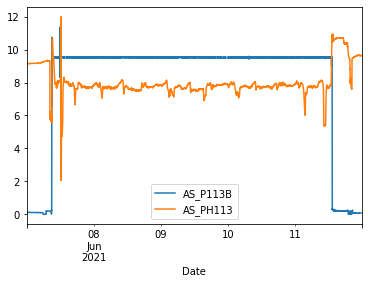

In [19]:
plot1=a.plot(["AS_P113B","AS_PH113"]);

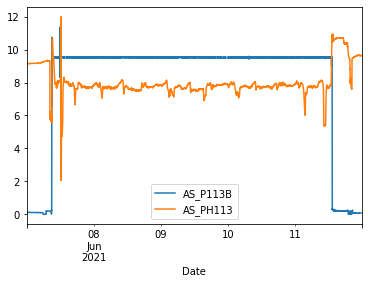

In [20]:
a.DF[["AS_P113B","AS_PH113"]].plot()

In [21]:
def plotter(df,columnlist,colorlist):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.figure(figsize=(30,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('time',fontsize=20)
    plt.ylabel(columnlist,fontsize=20)
    plt.title(f"{columnlist} vs. time",fontsize=20)
    targets = columnlist
    
    color = df.loc[:, colorlist].values
    plt.scatter(df.index,df[columnlist[0]] , c = "b", s = 0.5,)
    plt.scatter(df.index,df[columnlist[1]] , c = "r", s = 0.5,)
    
    #plt.colorbar()
    plt.legend(targets,prop={'size': 20})

<Figure size 432x288 with 0 Axes>

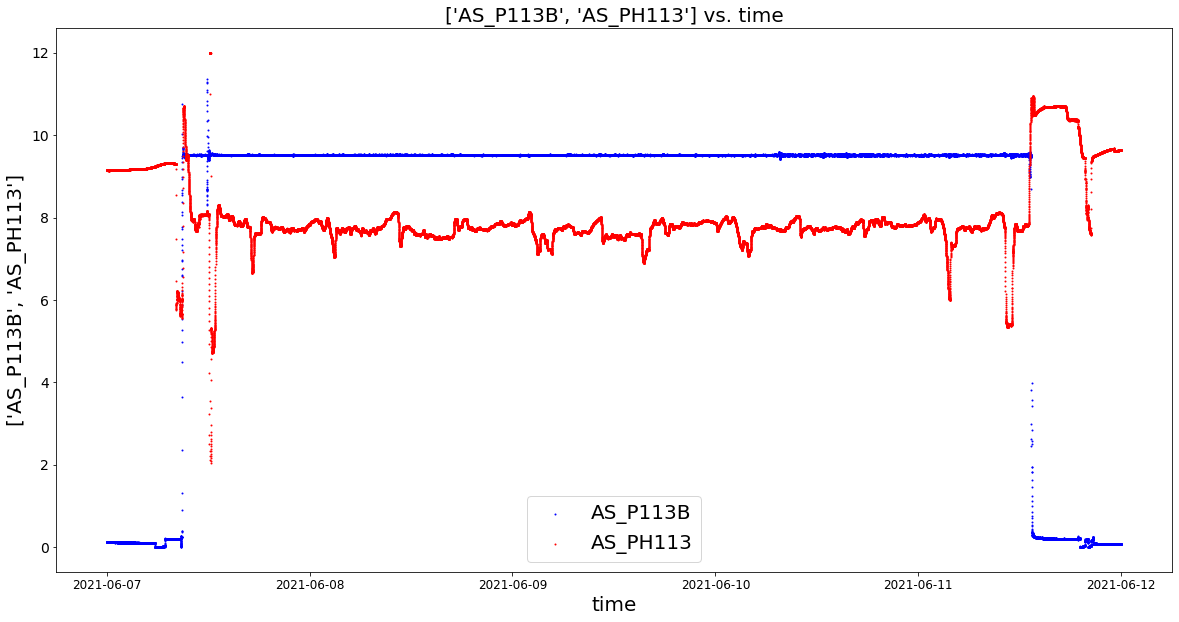

In [22]:
a.plotter(["AS_P113B","AS_PH113"])

<Figure size 432x288 with 0 Axes>

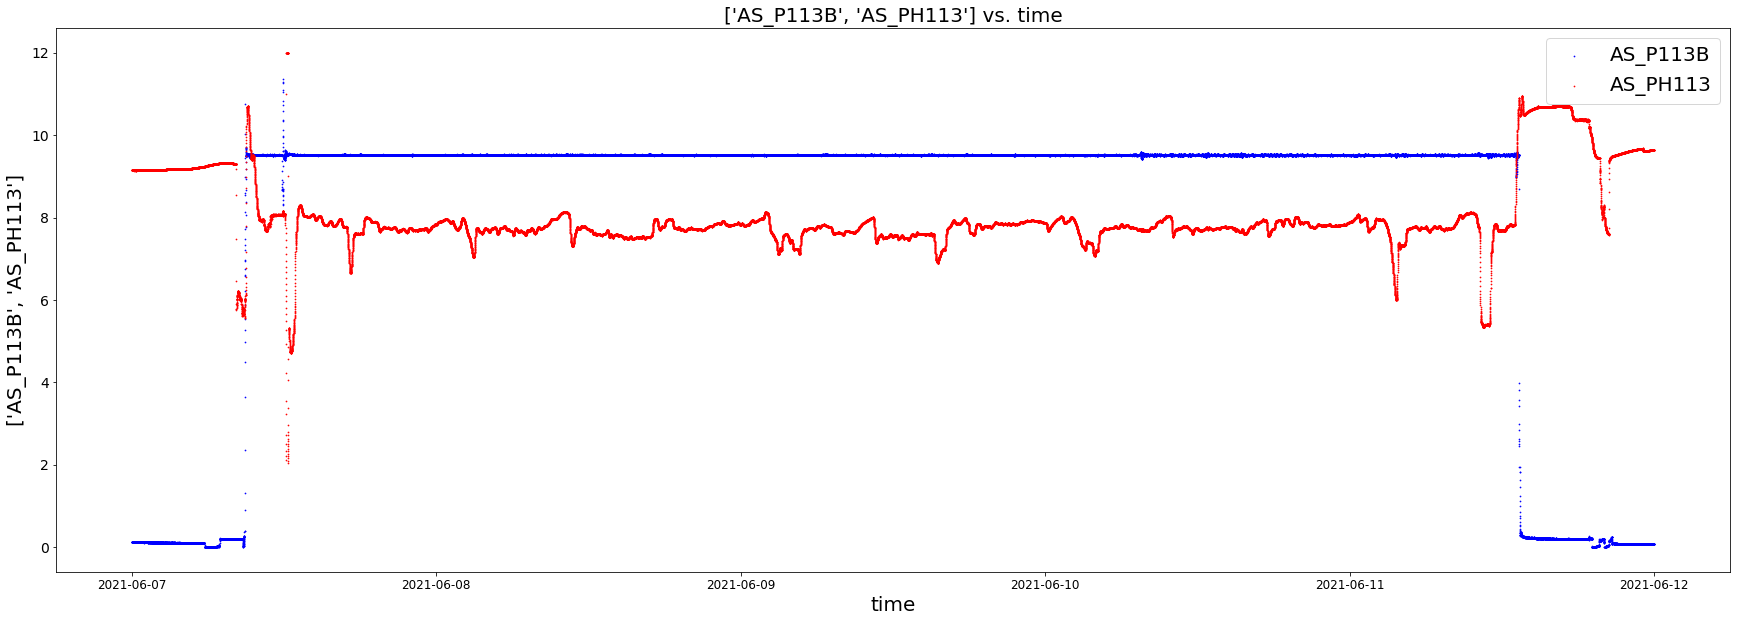

In [12]:
plotter(a.DF,["AS_P113B","AS_PH113"],["AS_PH113"]) 

In [13]:
import nltk
nltk.download('words')
from nltk.corpus import words
word_list = words.words()
# prints 236736
print (len(word_list))

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
236736


In [14]:
pytho=[a for a in word_list if a.startswith("rop")]

In [15]:
pytho

['ropable',
 'rope',
 'ropeable',
 'ropeband',
 'ropebark',
 'ropedance',
 'ropedancer',
 'ropedancing',
 'ropelayer',
 'ropelaying',
 'ropelike',
 'ropemaker',
 'ropemaking',
 'ropeman',
 'roper',
 'roperipe',
 'ropery',
 'ropes',
 'ropesmith',
 'ropetrick',
 'ropewalk',
 'ropewalker',
 'ropeway',
 'ropework',
 'ropily',
 'ropiness',
 'roping',
 'ropish',
 'ropishness',
 'ropp',
 'ropy']

In [16]:
print(os.environ)

environ({'NO_GCE_CHECK': 'True', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '11.1.1', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'SHLVL': '0', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.7.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '8.0.5.39', 'LAST_FORCED_REBUILD': '20210929', 'JPY_PARENT_PID': '53', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""],"debugAdapterMultiplexerPath":"/usr/local/bin/dap_multiplexer","enableLsp":true}', 'ENV': '/root/.bashrc', 'GLIBCXX_FORCE_NEW

In [17]:
!alfa="hello"
!export alfa="hello"

In [29]:
import plotly.express as px
fig=px.scatter(x=a.DF.index,y=a.DF['AS_PH113'])

fig.show()



In [34]:
def grafikon(fx,desc1,txt1,desc2="",txt2="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',title=None):
    '''
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+","+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(rows=1, cols=1)
    
    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),

        row=1, col=1

    )
    
    if ngraf==2:
        fig0.add_trace(
            go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),

            row=1, col=1
        )
    
    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    fig0.show()

In [35]:
grafikon(a.DF,"AS_PH113","PH","AS_T1134","T4",ngraf=2)
